<a href="https://colab.research.google.com/github/zerox80/Tensorflow-MNIST/blob/main/Vollst%C3%A4ndiger_MNIST_Workflow_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Datenexploration ---
Form der Trainingsbilder: (60000, 28, 28)
Form der Trainingslabels: (60000,)
Form der Testbilder: (10000, 28, 28)
Form der Testlabels: (10000,)
Datentyp der Bilder: uint8
Pixelwertebereich: Min=0, Max=255
-------------------------
Anzeige der ersten 25 Bilder aus dem Trainingsdatensatz...


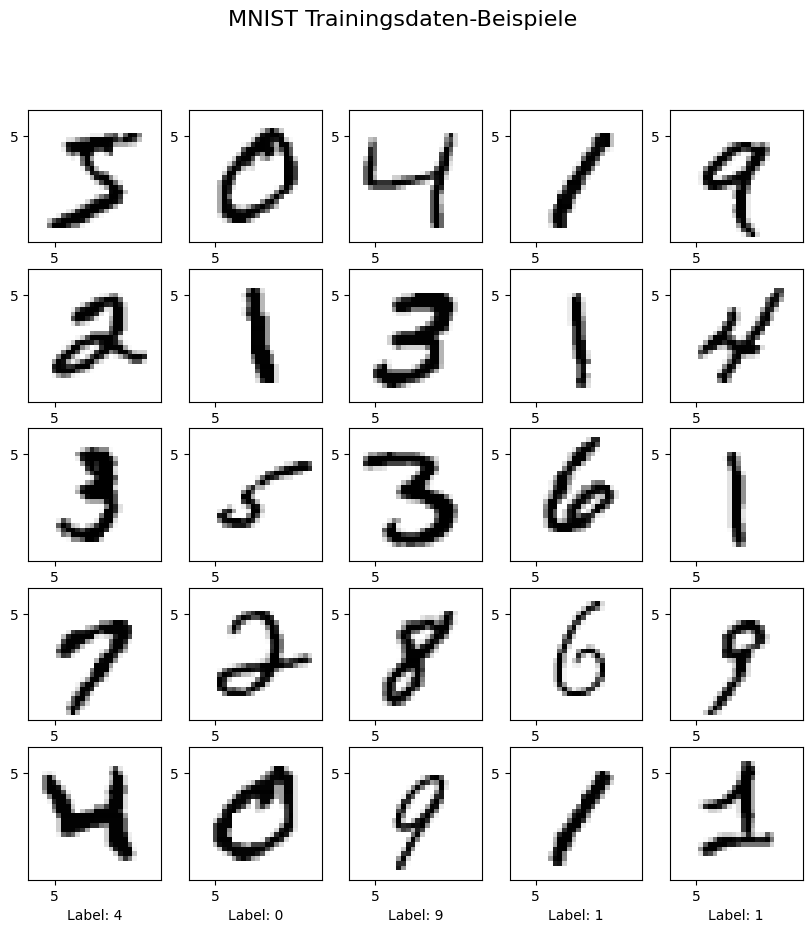


--- Datenvorverarbeitung ---
Form der umgeformten Trainingsbilder: (60000, 784)
Beispiel eines normalisierten Pixelwerts: 0.0000
Original-Label des ersten Bildes: 5
One-Hot-kodiertes Label des ersten Bildes: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
-------------------------

--- Modellzusammenfassung ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

-------------------------

Modell wurde erfolgreich kompiliert.

--- Training des Modells ---
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8120 - loss: 0.6882 - val_accuracy: 0.9418 - val_loss: 0.2112
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9470 - loss: 0.1929 - val_accuracy: 0.9566 - val_loss: 0.1553
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9628 - loss: 0.1333 - val_accuracy: 0.9617 - val_loss: 0.1326
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9687 - loss: 0.1089 - val_accuracy: 0.9643 - val_loss: 0.1195
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9771 - loss: 0.0837 - val_accuracy: 0.9691 - val_loss: 0.1050
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9819 - loss: 0.0654 - val_accuracy: 0.9689 - val_loss: 0.1044
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9834 - loss: 0.0599 - val_accuracy: 0.9715 - val_loss: 0.0952
Epoch 8/10

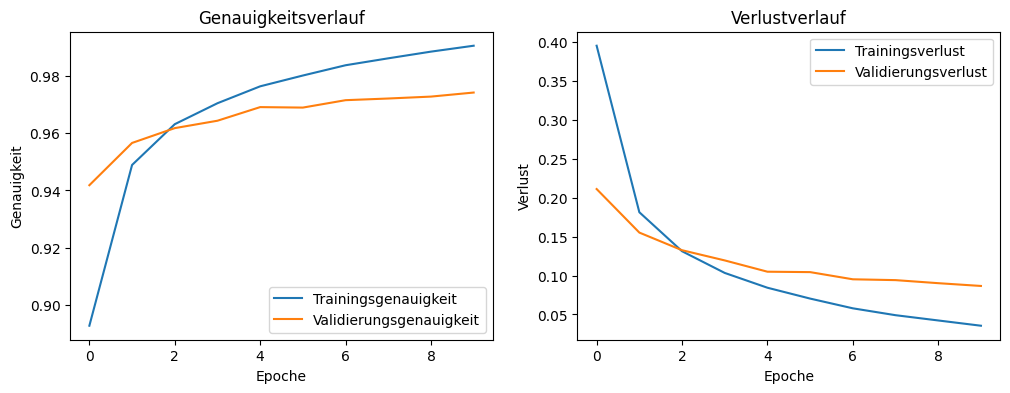


--- Evaluierung des Modells auf Testdaten ---
313/313 - 1s - 2ms/step - accuracy: 0.9766 - loss: 0.0780
Testverlust: 0.0780
Testgenauigkeit: 0.9766
-------------------------

--- Vorhersage für ein Beispielbild ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# 2.2 Fallstudie: Einfache Klassifikation (z.B. MNIST Ziffern)
# -----------------------------------------------------------------------------

# Laden des Keras-Standarddatensatzes
# Die Daten sind bereits in Trainings- (60.000) und Testsets (10.000) aufgeteilt.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Datenexploration und Visualisierung
print("--- Datenexploration ---")
print(f"Form der Trainingsbilder: {x_train.shape}")
print(f"Form der Trainingslabels: {y_train.shape}")
print(f"Form der Testbilder: {x_test.shape}")
print(f"Form der Testlabels: {y_test.shape}")
print(f"Datentyp der Bilder: {x_train.dtype}")
print(f"Pixelwertebereich: Min={np.min(x_train)}, Max={np.max(x_train)}")
print("-" * 25)

# Visualisierung der ersten 25 Ziffern aus dem Trainingsdatensatz
print("Anzeige der ersten 25 Bilder aus dem Trainingsdatensatz...")
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([5])
    plt.yticks([5])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(f"Label: {y_train[i]}")
plt.suptitle("MNIST Trainingsdaten-Beispiele", fontsize=16)
plt.show()


# -----------------------------------------------------------------------------
# 2.3 Datenvorverarbeitung (Preprocessing)
# -----------------------------------------------------------------------------

# Umformung der Bilder von 2D (28x28) in 1D-Vektoren (784)
# Dies ist für die Verwendung mit Dense-Layern erforderlich.
image_vector_size = 28 * 28
x_train_flat = x_train.reshape(x_train.shape[0], image_vector_size)
x_test_flat = x_test.reshape(x_test.shape[0], image_vector_size)

# Normalisierung (Skalierung) der Daten
# Konvertierung der Pixelwerte von Ganzzahlen (0-255) in Fließkommazahlen (0-1)
x_train_normalized = x_train_flat.astype('float32') / 255.0
x_test_normalized = x_test_flat.astype('float32') / 255.0

# One-Hot-Encoding für Labels
# Konvertiert die ganzzahligen Labels (z.B. 5) in einen binären Vektor (z.B. )
num_classes = 10
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

print("\n--- Datenvorverarbeitung ---")
print(f"Form der umgeformten Trainingsbilder: {x_train_normalized.shape}")
print(f"Beispiel eines normalisierten Pixelwerts: {x_train_normalized[0][0]:.4f}")
print(f"Original-Label des ersten Bildes: {y_train[0]}")
print(f"One-Hot-kodiertes Label des ersten Bildes: {y_train_one_hot[0]}")
print("-" * 25)


# -----------------------------------------------------------------------------
# 2.4 Modellbau: Die Sequential-API
# -----------------------------------------------------------------------------

# Modellbau mit der Sequential-API
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(image_vector_size,)),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Das Modell zusammenbauen und eine Zusammenfassung anzeigen
print("\n--- Modellzusammenfassung ---")
model.summary()
print("-" * 25)


# -----------------------------------------------------------------------------
# 2.5 Kompilieren des Modells
# -----------------------------------------------------------------------------

model.compile(
    optimizer='adam',                          # Optimizer: Wie das Modell lernt
    loss='categorical_crossentropy',           # Verlustfunktion: Was "Fehler" ist
    metrics=['accuracy']                       # Metriken: Wie wir den Erfolg messen
)

print("\nModell wurde erfolgreich kompiliert.")


# -----------------------------------------------------------------------------
# 2.6 Training des Modells
# -----------------------------------------------------------------------------

print("\n--- Training des Modells ---")
# Parameter für das Training
epochs = 10
batch_size = 128
validation_split = 0.2  # 20% der Trainingsdaten werden für die Validierung verwendet

# Training mit der.fit()-Methode
history = model.fit(
    x_train_normalized,
    y_train_one_hot,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    verbose=1  # Zeigt eine Fortschrittsanzeige für jede Epoche
)
print("-" * 25)

# Visualisierung des Trainingsverlaufs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Trainingsgenauigkeit')
plt.plot(history.history['val_accuracy'], label='Validierungsgenauigkeit')
plt.title('Genauigkeitsverlauf')
plt.xlabel('Epoche')
plt.ylabel('Genauigkeit')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Trainingsverlust')
plt.plot(history.history['val_loss'], label='Validierungsverlust')
plt.title('Verlustverlauf')
plt.xlabel('Epoche')
plt.ylabel('Verlust')
plt.legend()
plt.show()


# -----------------------------------------------------------------------------
# 2.7 Evaluierung und Vorhersage
# -----------------------------------------------------------------------------

#.evaluate(): Testen auf unbekannten Daten
print("\n--- Evaluierung des Modells auf Testdaten ---")
test_loss, test_accuracy = model.evaluate(
    x_test_normalized,
    y_test_one_hot,
    verbose=2
)
print(f"Testverlust: {test_loss:.4f}")
print(f"Testgenauigkeit: {test_accuracy:.4f}")
print("-" * 25)

#.predict(): Neue Vorhersagen treffen
print("\n--- Vorhersage für ein Beispielbild ---")
# Vorhersagen für den gesamten Testsatz treffen
predictions = model.predict(x_test_normalized)

# Beispiel: Vorhersage für ein bestimmtes Bild im Testsatz
try:
    sample_index = int(input(f"Geben Sie den Index des Bildes ein (0 bis {len(x_test) - 1}): "))
    if 0 <= sample_index < len(x_test):
        predicted_probabilities = predictions[sample_index]
        predicted_label = np.argmax(predicted_probabilities)
        true_label = y_test[sample_index]

        print(f"Vorhergesagte Wahrscheinlichkeiten für Bild {sample_index}:")
        # Druckt die Wahrscheinlichkeiten für jede Klasse (0-9)
        for i, prob in enumerate(predicted_probabilities):
            print(f"  Klasse {i}: {prob:.4f}")

        print(f"\nVorhergesagtes Label: {predicted_label}")
        print(f"Wahres Label: {true_label}")

        # Visualisierung des Bildes zur Bestätigung
        plt.figure()
        plt.imshow(x_test[sample_index], cmap=plt.cm.binary)
        plt.title(f"Vorhersage: {predicted_label}, Wahr: {true_label}")
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.show()
    else:
        print("Ungültiger Index. Bitte geben Sie eine Zahl im gültigen Bereich ein.")
except ValueError:
    print("Ungültige Eingabe. Bitte geben Sie eine ganze Zahl ein.")

print("-" * 25)